### 1040 모델 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
import numpy

In [2]:
d1 = pd.read_csv("data/1040/LOT1_20210610194618.csv")
d2 = pd.read_csv("data/1040/LOT1_20210611074936.csv")
d3 = pd.read_csv("data/1040/LOT1_20210612084542.csv")
d4 = pd.read_csv("data/1040/LOT1_20210614074438.csv")
d5 = pd.read_csv("data/1040/LOT1_20210615201919.csv")
d6 = pd.read_csv("data/1040/LOT1_20210616073438.csv")

In [3]:
df = pd.concat([d1, d2, d3, d4, d5, d6])
df

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,...,[SEQ4] RisingTime,[SEQ4] FallingTime,[SEQ5] F0 Vibration,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 25
0,1,CH6,164.7,1.12,1.2,3.0,0.0,173.9,2.22,14.5,...,4.1,27.9,1.33,PASS,NaN,2021-06-10 19:51:52,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
1,1,CH5,168.1,1.21,0.0,1.8,0.0,172.8,2.27,6.5,...,4.4,29.2,1.45,FAIL,NaN,2021-06-10 19:51:53,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2,1,CH4,162.0,1.38,0.8,1.8,0.0,167.6,2.34,14.2,...,4.7,26.9,1.59,FAIL,NaN,2021-06-10 19:51:53,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
3,1,CH1,161.9,1.03,0.0,3.1,0.0,176.9,2.35,13.4,...,5.2,33.0,1.22,FAIL,NaN,2021-06-10 19:51:53,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
4,2,CH6,162.6,1.18,4.0,2.1,0.0,172.1,2.07,13.0,...,4.3,24.4,1.33,PASS,NaN,2021-06-10 19:52:14,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,1055,CH4,158.4,1.14,8.7,2.2,2.2,174.6,2.32,1.1,...,4.4,27.0,1.32,PASS,NaN,2021-06-17 03:28:10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
4219,1055,CH5,160.8,1.14,0.0,1.5,0.0,174.3,2.08,20.4,...,4.4,22.1,1.26,PASS,NaN,2021-06-17 03:28:13,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
4220,1055,CH6,164.0,1.12,2.5,3.1,0.0,172.5,2.18,9.3,...,4.4,24.6,1.29,PASS,NaN,2021-06-17 03:28:25,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
4221,1057,CH1,150.7,1.09,2.5,2.5,0.0,173.6,2.06,3.8,...,5.6,25.1,1.23,PASS,NaN,2021-06-17 03:28:28,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15339 entries, 0 to 4222
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUM                   15339 non-null  int64         
 1   CH                    15339 non-null  object        
 2   [SEQ1]  F0 Current    15339 non-null  float64       
 3   [SEQ1]  F0 Vibration  15339 non-null  float64       
 4   [SEQ1]  Noise Touch   15339 non-null  float64       
 5   [SEQ1]  Noise THD1    15339 non-null  float64       
 6   [SEQ1]  Noise Band1   15339 non-null  float64       
 7   [SEQ2]  F0 Frequency  15339 non-null  float64       
 8   [SEQ2]  F0 Vibration  15339 non-null  float64       
 9   [SEQ2]  Noise Touch   15339 non-null  float64       
 10  [SEQ2]  Noise THD1    15339 non-null  float64       
 11  [SEQ2]  Noise Band2   15339 non-null  float64       
 12  [SEQ3]  F0 Vibration  15339 non-null  float64       
 13  [SEQ3]  Noise Tou

In [5]:
df.set_index('DATE', drop=True, inplace=True)
df.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,...,[SEQ3] Noise Band1,[SEQ4] RisingTime,[SEQ4] FallingTime,[SEQ5] F0 Vibration,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 25
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-10 19:51:52,1,CH6,164.7,1.12,1.2,3.0,0.0,173.9,2.22,14.5,...,0.0,4.1,27.9,1.33,PASS,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10 19:51:53,1,CH5,168.1,1.21,0.0,1.8,0.0,172.8,2.27,6.5,...,30.8,4.4,29.2,1.45,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10 19:51:53,1,CH4,162.0,1.38,0.8,1.8,0.0,167.6,2.34,14.2,...,0.0,4.7,26.9,1.59,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10 19:51:53,1,CH1,161.9,1.03,0.0,3.1,0.0,176.9,2.35,13.4,...,0.0,5.2,33.0,1.22,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10 19:52:14,2,CH6,162.6,1.18,4.0,2.1,0.0,172.1,2.07,13.0,...,0.0,4.3,24.4,1.33,PASS,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN


In [6]:
df.index.hour.value_counts().sort_index()

0      288
1      323
2      549
3      169
7      275
8     2061
9     2446
10    2100
11    1454
19      88
20    1458
21    1981
22    1214
23     933
Name: DATE, dtype: int64

### 1. [SEQ1, SEQ2, SEQ3, SEQ5] Vibration / Noise 전체적인 분포

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ1]  F0 Vibration, dtype: object

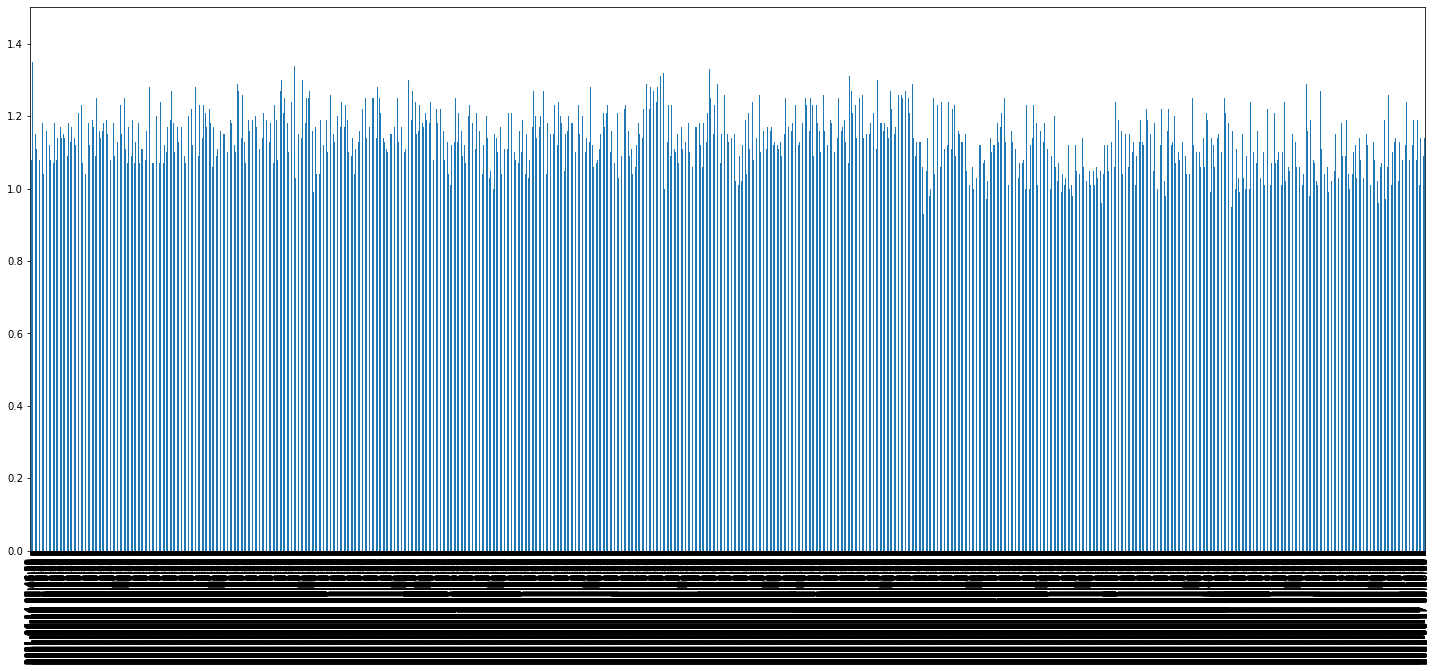

In [7]:
df['[SEQ1]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ2]  F0 Vibration, dtype: object

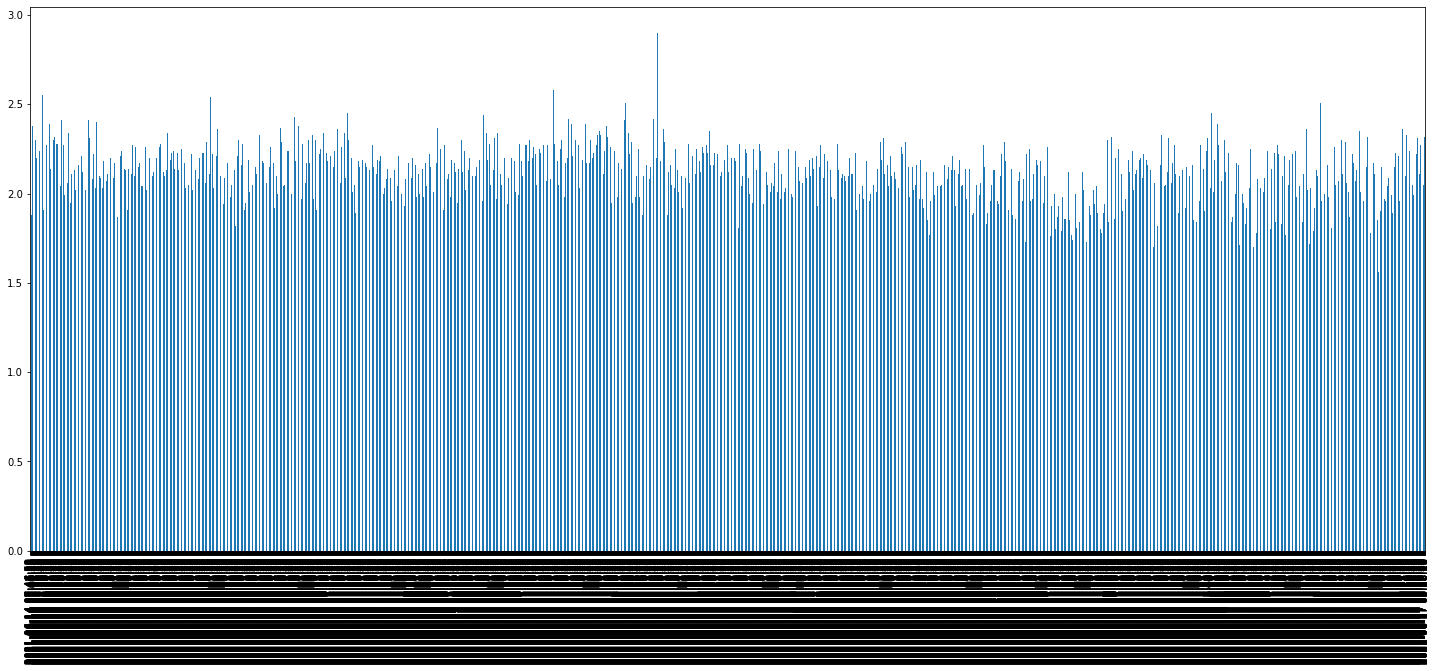

In [8]:
df['[SEQ2]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ3]  F0 Vibration, dtype: object

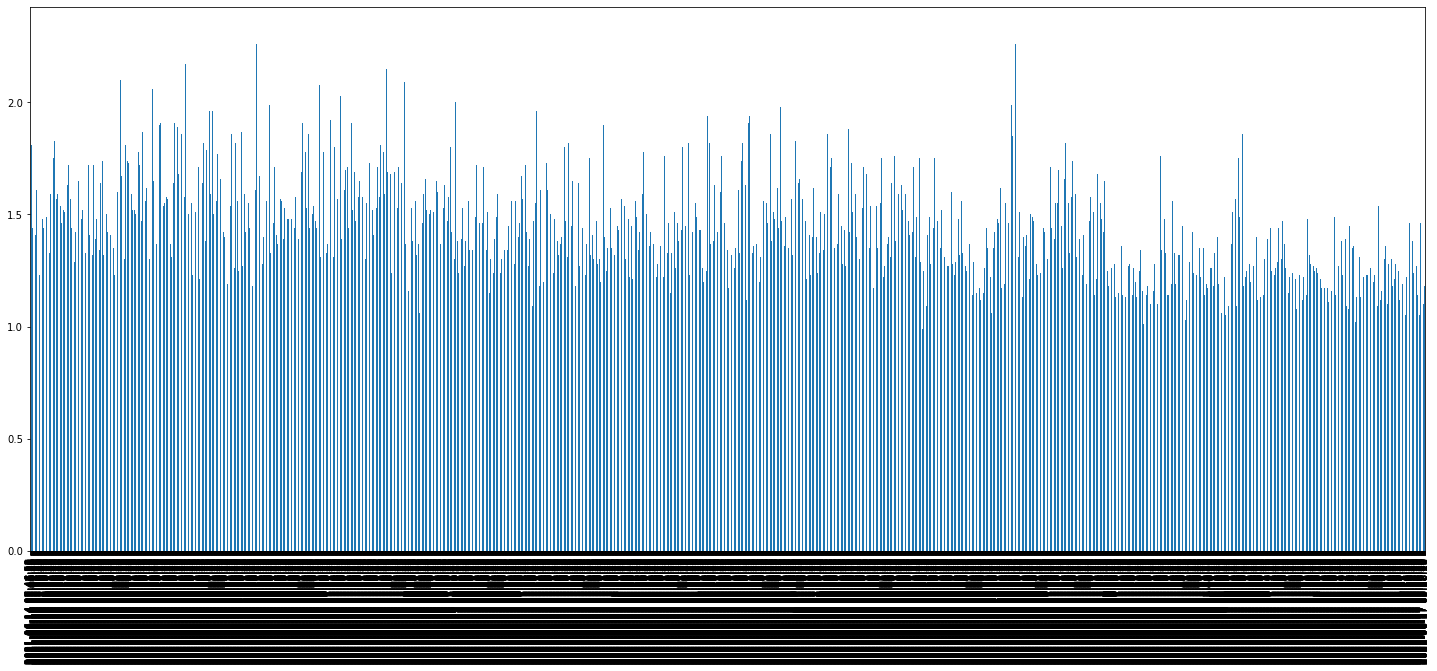

In [162]:
df['[SEQ3]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ5]  F0 Vibration, dtype: object

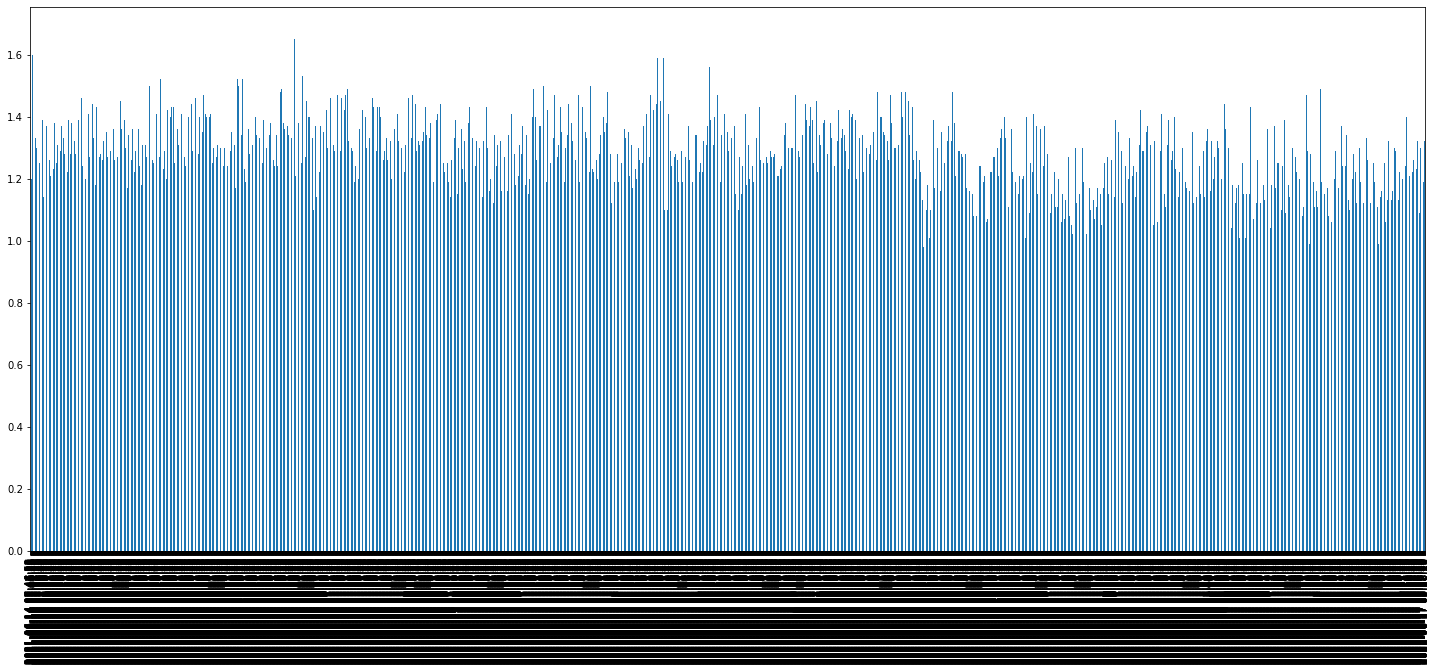

In [164]:
df['[SEQ5]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

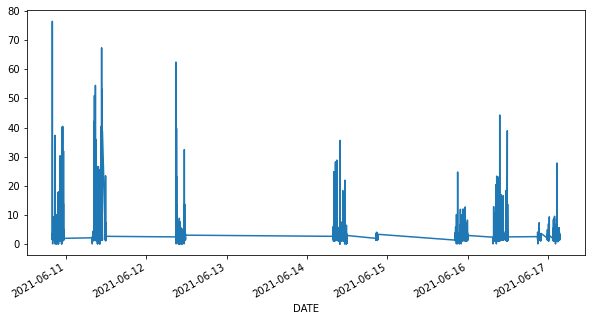

In [185]:
df['[SEQ1]  Noise THD1'].plot(figsize=(10, 5))

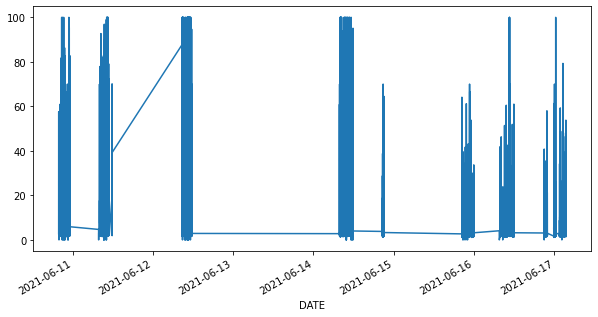

In [180]:
df['[SEQ2]  Noise THD1'].plot(figsize=(10, 5))

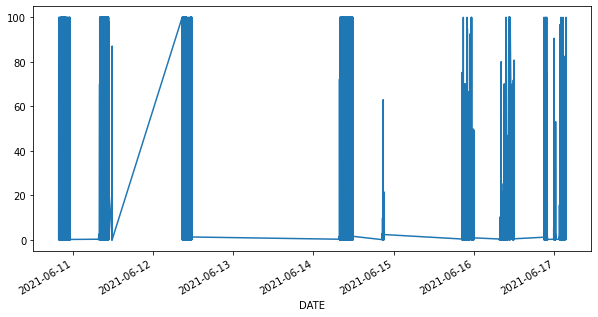

In [181]:
df['[SEQ3]  Noise THD1'].plot(figsize=(10, 5))

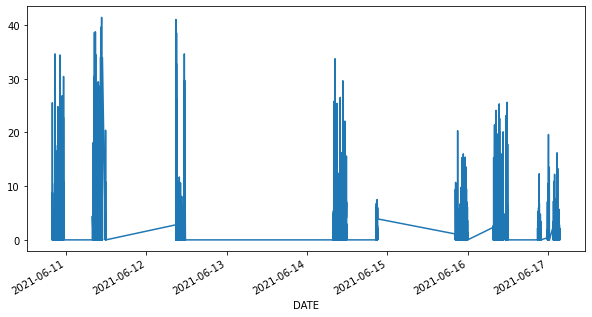

In [182]:
df['[SEQ1]  Noise Band1'].plot(figsize=(10, 5))

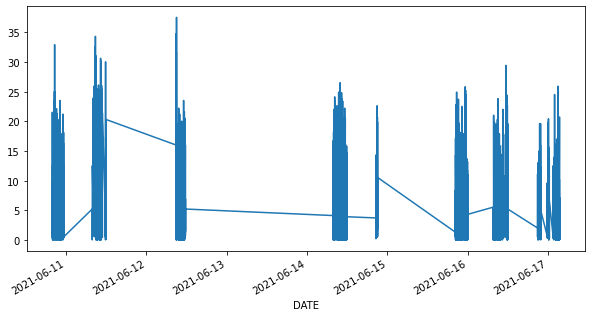

In [174]:
df['[SEQ2]  Noise Band2'].plot(figsize=(10, 5))

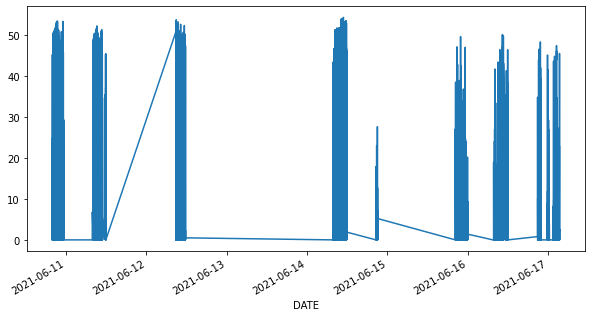

In [175]:
df['[SEQ3]  Noise Band1'].plot(figsize=(10, 5))

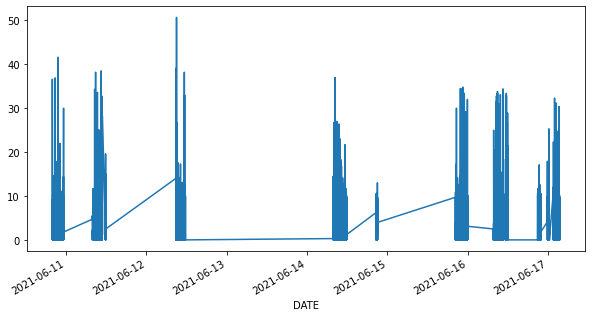

In [176]:
df['[SEQ1]  Noise Touch'].plot(figsize=(10, 5))

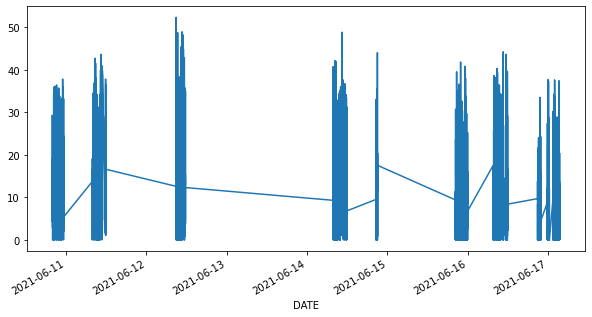

In [177]:
df['[SEQ2]  Noise Touch'].plot(figsize=(10, 5))

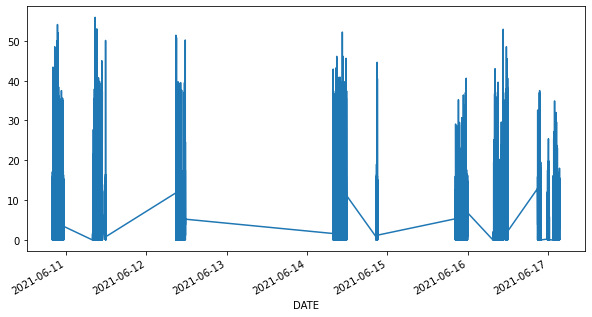

In [178]:
df['[SEQ3]  Noise Touch'].plot(figsize=(10, 5))

### 2. SEQ1 일별 평균 추이 (2021.06.09 ~ 2021.06.17)

### F0 Vibration

In [9]:
df2 = pd.concat([d1, d2, d3, d4, d5, d6])

In [10]:
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.normalize()
df2.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,...,[SEQ4] RisingTime,[SEQ4] FallingTime,[SEQ5] F0 Vibration,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 25
0,1,CH6,164.7,1.12,1.2,3.0,0.0,173.9,2.22,14.5,...,4.1,27.9,1.33,PASS,NaN,2021-06-10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
1,1,CH5,168.1,1.21,0.0,1.8,0.0,172.8,2.27,6.5,...,4.4,29.2,1.45,FAIL,NaN,2021-06-10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2,1,CH4,162.0,1.38,0.8,1.8,0.0,167.6,2.34,14.2,...,4.7,26.9,1.59,FAIL,NaN,2021-06-10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
3,1,CH1,161.9,1.03,0.0,3.1,0.0,176.9,2.35,13.4,...,5.2,33.0,1.22,FAIL,NaN,2021-06-10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
4,2,CH6,162.6,1.18,4.0,2.1,0.0,172.1,2.07,13.0,...,4.3,24.4,1.33,PASS,NaN,2021-06-10,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN


In [11]:
df2.set_index('DATE', drop=True, inplace=True)
df2.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,...,[SEQ3] Noise Band1,[SEQ4] RisingTime,[SEQ4] FallingTime,[SEQ5] F0 Vibration,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 25
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-10,1,CH6,164.7,1.12,1.2,3.0,0.0,173.9,2.22,14.5,...,0.0,4.1,27.9,1.33,PASS,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10,1,CH5,168.1,1.21,0.0,1.8,0.0,172.8,2.27,6.5,...,30.8,4.4,29.2,1.45,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10,1,CH4,162.0,1.38,0.8,1.8,0.0,167.6,2.34,14.2,...,0.0,4.7,26.9,1.59,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10,1,CH1,161.9,1.03,0.0,3.1,0.0,176.9,2.35,13.4,...,0.0,5.2,33.0,1.22,FAIL,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN
2021-06-10,2,CH6,162.6,1.18,4.0,2.1,0.0,172.1,2.07,13.0,...,0.0,4.3,24.4,1.33,PASS,NaN,1040 SPL HANG SAMSUNG-OPO,M1,NaN,NaN


In [12]:
df2_mean = df2.resample(rule='D').mean()
df2_mean

,NUM,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,...,[SEQ3] F0 Vibration,[SEQ3] Noise Touch,[SEQ3] Noise THD1,[SEQ3] Noise Band1,[SEQ4] RisingTime,[SEQ4] FallingTime,[SEQ5] F0 Vibration,DUT_ID,REMARK,Unnamed: 25
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-10,281.500000,162.527402,1.132874,3.659520,2.495107,0.859386,171.774778,2.121810,10.225000,9.668416,...,1.380574,5.829849,10.572731,5.685187,4.540925,26.799555,1.303190,NaN,NaN,NaN
2021-06-11,233.512889,162.771697,1.111402,4.632975,3.079270,1.591031,172.886198,2.033958,10.929968,15.337755,...,1.427873,6.928518,24.088077,12.338722,4.227068,25.551074,1.256375,NaN,NaN,NaN
2021-06-12,232.625202,161.804093,1.114012,4.802854,2.460258,1.003823,172.555897,2.005256,12.296230,20.697577,...,1.434157,6.023802,13.003500,6.920032,4.218201,26.441519,1.256053,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,358.000350,162.352727,1.101972,3.605629,2.295664,0.813916,173.078776,2.003972,10.047622,13.799825,...,1.451094,5.864895,11.430245,6.564441,4.227797,25.902238,1.239399,NaN,NaN,NaN
2021-06-15,286.125602,158.611597,1.102232,2.889015,2.260175,0.571335,172.267090,2.087689,7.777155,3.553567,...,1.253344,5.176674,2.110941,1.540613,4.532385,25.524070,1.231816,NaN,NaN,NaN
2021-06-16,362.540373,161.659938,1.109917,4.130124,2.441753,1.123188,172.472429,2.032267,9.219910,5.660939,...,1.346611,5.247861,4.734645,3.243927,4.381850,24.579400,1.227785,NaN,NaN,NaN
2021-06-17,890.124906,158.386606,1.082039,2.986230,2.249059,0.525056,172.614296,2.030339,7.112415,4.052596,...,1.269541,4.490519,2.611663,1.687208,4.473965,24.439278,1.191543,NaN,NaN,NaN


In [13]:
SEQ1_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ1]  F0 Vibration'])
SEQ1_Vibra

,[SEQ1] F0 Vibration
DATE,
2021-06-10,1.132874
2021-06-11,1.111402
2021-06-12,1.114012
2021-06-13,NaN
2021-06-14,1.101972
2021-06-15,1.102232
2021-06-16,1.109917
2021-06-17,1.082039


In [14]:
SEQ1_Vibra2 = SEQ1_Vibra.drop([SEQ1_Vibra.index[3]])
SEQ1_Vibra2

,[SEQ1] F0 Vibration
DATE,
2021-06-10,1.132874
2021-06-11,1.111402
2021-06-12,1.114012
2021-06-14,1.101972
2021-06-15,1.102232
2021-06-16,1.109917
2021-06-17,1.082039


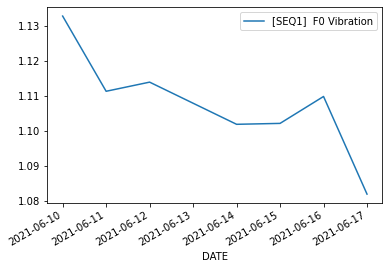

In [15]:
ax = SEQ1_Vibra2.plot()
plt.show()

### Noise Touch

In [16]:
SEQ1_noise = pd.DataFrame(df2_mean, columns= ['[SEQ1]  Noise Touch'])
SEQ1_noise2 = SEQ1_noise.drop([SEQ1_noise.index[3]])
SEQ1_noise2

,[SEQ1] Noise Touch
DATE,
2021-06-10,3.659520
2021-06-11,4.632975
2021-06-12,4.802854
2021-06-14,3.605629
2021-06-15,2.889015
2021-06-16,4.130124
2021-06-17,2.986230


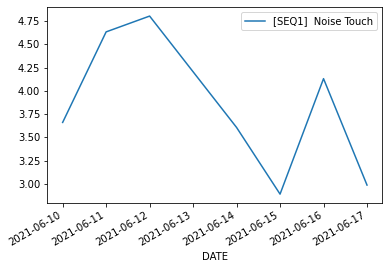

In [17]:
ax = SEQ1_noise2.plot()
plt.show()

##### SEQ1인 고정 주파수 소음의 추이를 확인해보았을 때, 3.0부터 4.75까지 다양하게 나타남을 알 수 있다.
##### 특히, 2021.6.15일에 가장 낮은 Noise Touch 수치



### 3. SEQ2 일별 평균 추이 (2021.06.09 ~ 2021.06.17)

### F0 Vibration

In [18]:
SEQ2_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ2]  F0 Vibration'])
SEQ2_Vibra2 = SEQ2_Vibra.drop([SEQ1_Vibra.index[3]])
SEQ2_Vibra2

,[SEQ2] F0 Vibration
DATE,
2021-06-10,2.121810
2021-06-11,2.033958
2021-06-12,2.005256
2021-06-14,2.003972
2021-06-15,2.087689
2021-06-16,2.032267
2021-06-17,2.030339


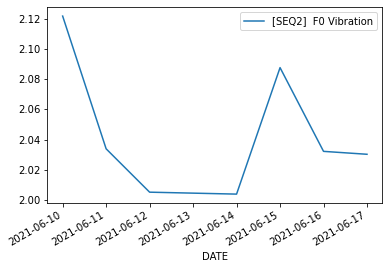

In [199]:
ax = SEQ2_Vibra2.plot()
plt.show()

### Noise Touch

In [19]:
SEQ2_noise = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise Touch'])
SEQ2_noise = SEQ2_noise.drop([SEQ2_noise.index[3]])
SEQ2_noise

,[SEQ2] Noise Touch
DATE,
2021-06-10,10.225000
2021-06-11,10.929968
2021-06-12,12.296230
2021-06-14,10.047622
2021-06-15,7.777155
2021-06-16,9.219910
2021-06-17,7.112415


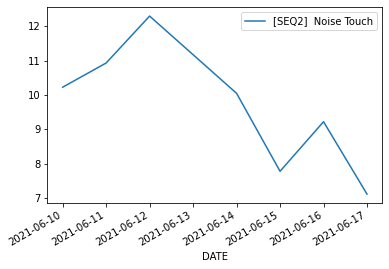

In [215]:
ax = SEQ2_noise.plot()
plt.show()

### 4. SEQ3 일별 평균 추이 (2021.06.09 ~ 2021.06.17)

### F0 Vibration

In [20]:
SEQ3_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ3]  F0 Vibration'])

In [21]:
SEQ3_Vibra2 = SEQ3_Vibra.drop([SEQ3_Vibra.index[3]])
SEQ3_Vibra2

,[SEQ3] F0 Vibration
DATE,
2021-06-10,1.380574
2021-06-11,1.427873
2021-06-12,1.434157
2021-06-14,1.451094
2021-06-15,1.253344
2021-06-16,1.346611
2021-06-17,1.269541


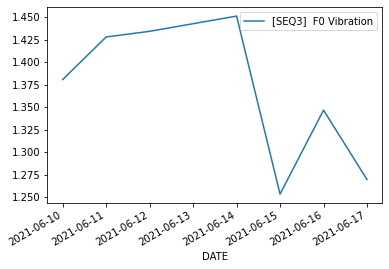

In [225]:
ax = SEQ3_Vibra2.plot()
plt.show()

### Noise

In [22]:
SEQ3_noise = pd.DataFrame(df2_mean, columns= ['[SEQ3]  Noise Touch'])
SEQ3_noise = SEQ3_noise.drop([SEQ3_noise.index[3]])
SEQ3_noise

,[SEQ3] Noise Touch
DATE,
2021-06-10,5.829849
2021-06-11,6.928518
2021-06-12,6.023802
2021-06-14,5.864895
2021-06-15,5.176674
2021-06-16,5.247861
2021-06-17,4.490519


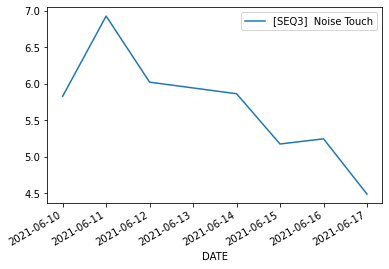

In [230]:
ax = SEQ3_noise.plot()
plt.show()

##### (2021.6.10 ~ 2021.6.17 측정 결과)
##### SEQ3인 고정 주파수 소음의 추이를 확인해보았을 때, 4.5부터 7.0까지 다소 큰 폭을 보임
##### 2021.6.11일에 가장 높은 Noise Touch 수치

##### 특정 기간에서 SEQ1, SEQ2, SEQ3의 평균 진동 폭을 확인해본 결과,
##### SEQ1(고정주파수) :  1.08 ~ 1.13
##### SEQ2(sweep주파수) : 2.00 ~ 2.12 
##### SEQ3 : 1.250 ~ 1.450 
##### 6/10~6/17까지 데이터의 진동수가 급격하게 늘어나거나 줄어든 모습은 확인되지 않았음을 알 수 있다.

## 상관분석

### 1. SEQ1 상관분석

In [23]:
SEQ1_df = df[['[SEQ1]  F0 Current', '[SEQ1]  F0 Vibration', '[SEQ1]  Noise Touch', '[SEQ1]  Noise THD1', '[SEQ1]  Noise Band1']]

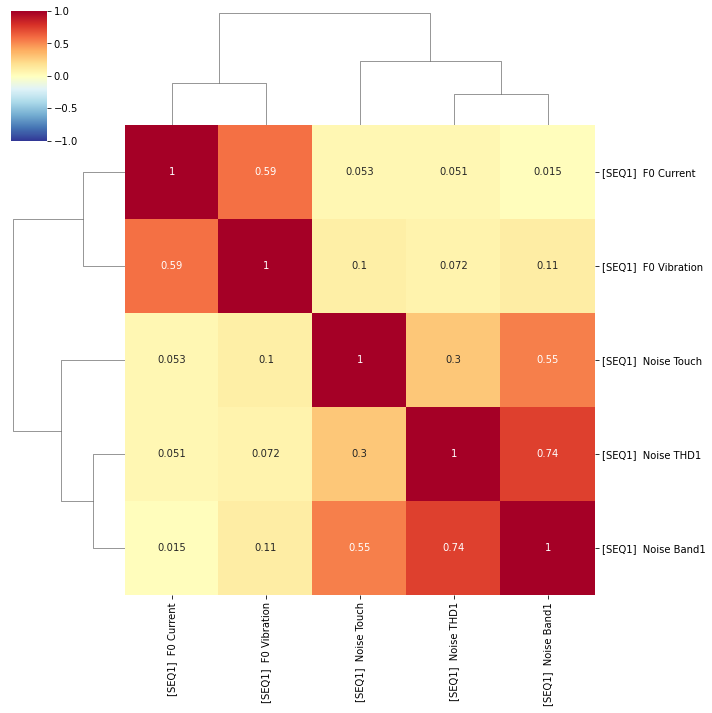

In [245]:
data = SEQ1_df.corr()

sns.clustermap(data, 
               annot = True,      
               cmap = 'RdYlBu_r', 
               vmin = -1, vmax = 1, 
              )

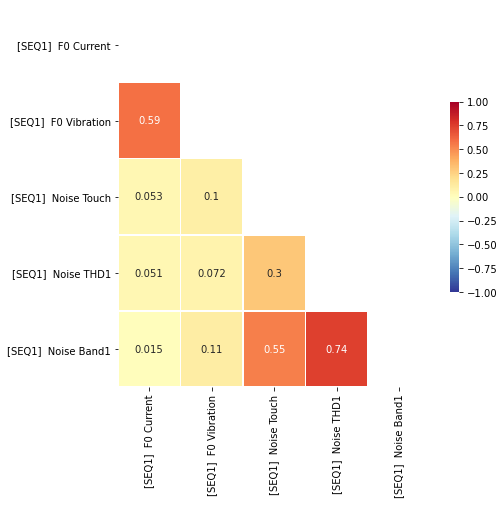

In [241]:
data = SEQ1_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 상관분석을 통해, 알아내고자 하는 것 : 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ1]  F0 Vibration과 Noise Touch의 상관계수 : 0.1
##### [SEQ1]  F0 Vibration과 Noise THD1의 상관계수 : 0.072
##### [SEQ1]  F0 Vibration과 Noise Band1의 상관계수 : 0.11



In [26]:
import scipy.stats as stats
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise Band1'])

(0.11472553671176322, 4.186870626970271e-46)

In [27]:
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise THD1'])

(0.07214251336757012, 3.6916040225213267e-19)

In [28]:
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise Touch'])

(0.10468719602838072, 1.2192623786338708e-38)

#### p값이 모두 0.05 혹은 0.01보다 크기 때문에 상관계수를 정의할 수 없다.!

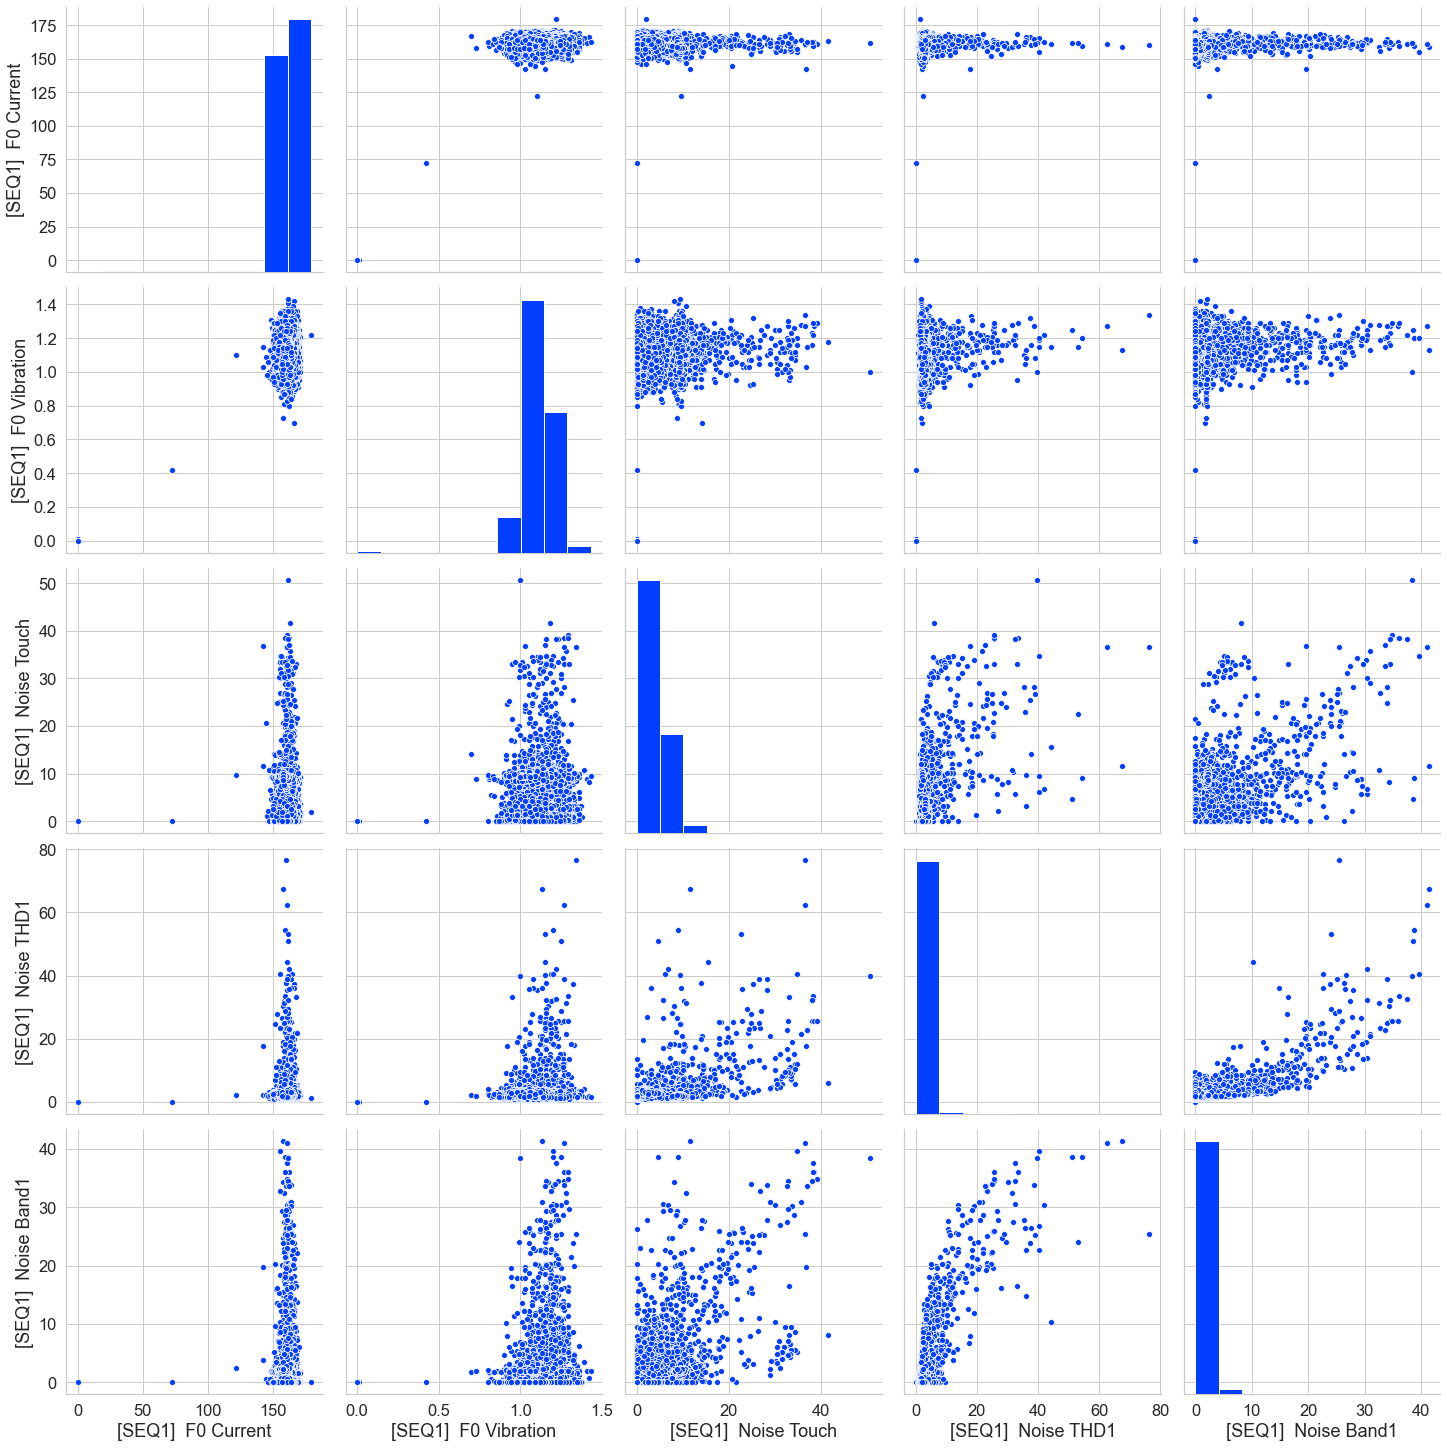

In [263]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ1_df, height=4)

### 2. SEQ2 상관분석

In [29]:
SEQ2_df = df[['[SEQ2]  F0 Vibration', '[SEQ2]  Noise Touch', '[SEQ2]  Noise THD1', '[SEQ2]  Noise Band2']]

In [30]:
data2 = SEQ2_df.corr()

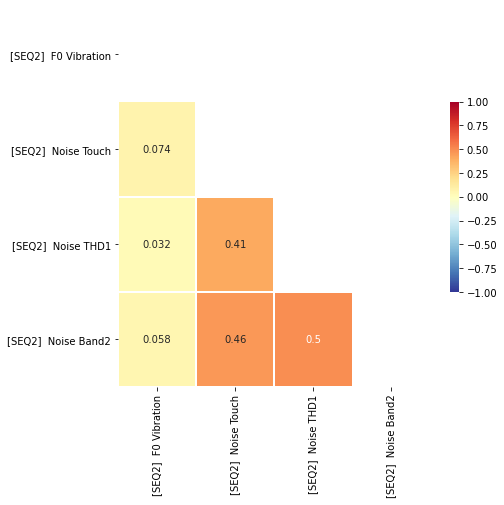

In [31]:
data2 = SEQ2_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data2, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### sweep 주파수 Vibration과 Noise의 선형관계

##### [SEQ2]  F0 Vibration과 Noise Touch의 상관계수 : 0.074
##### [SEQ2]  F0 Vibration과 Noise THD1의 상관계수 : 0.032
##### [SEQ2]  F0 Vibration과 Noise Band2의 상관계수 : 0.058

In [38]:
import scipy.stats as stats
stats.pearsonr(x = SEQ2_df['[SEQ2]  F0 Vibration'], y = SEQ2_df['[SEQ2]  Noise Band2'])

(0.05817709311125841, 5.562618099910181e-13)

In [35]:
stats.pearsonr(x = SEQ2_df['[SEQ2]  F0 Vibration'], y = SEQ2_df['[SEQ2]  Noise THD1'])

(0.031748062184294226, 8.400015675232706e-05)

In [36]:
stats.pearsonr(x = SEQ2_df['[SEQ2]  F0 Vibration'], y = SEQ2_df['[SEQ2]  Noise Touch'])

(0.07423454747755752, 3.3864278159786304e-20)

#### p값이 모두 0.05 혹은 0.01보다 크기 때문에 상관계수를 정의할 수 없다.!

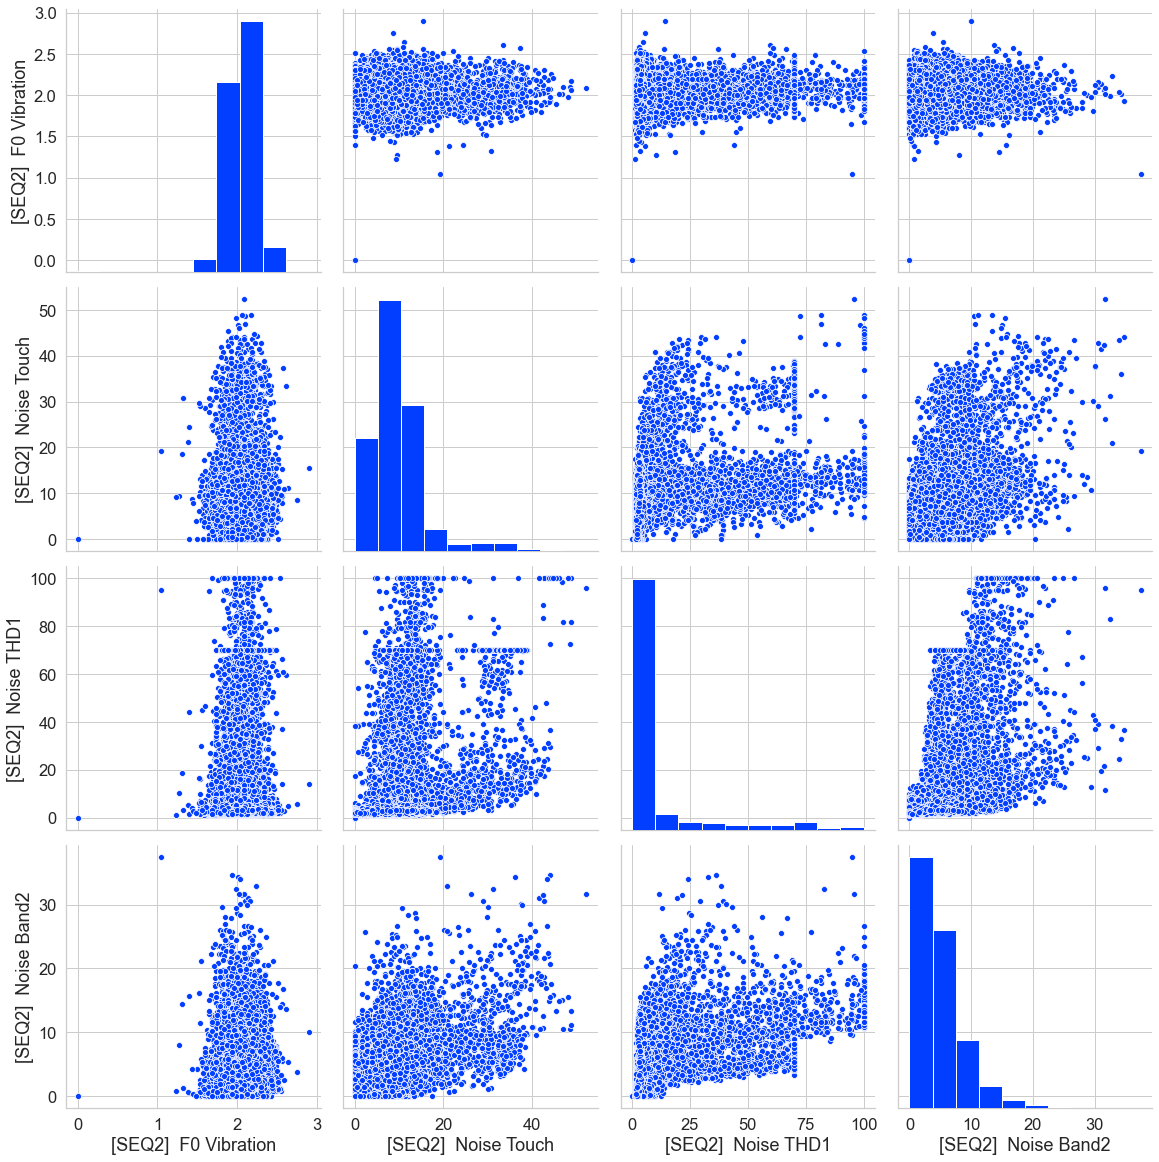

In [267]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ2_df, height=4)

### 3. SEQ3 상관분석

In [40]:
SEQ3_df = df[['[SEQ3]  F0 Vibration', '[SEQ3]  Noise Touch', '[SEQ3]  Noise THD1', '[SEQ3]  Noise Band1']]

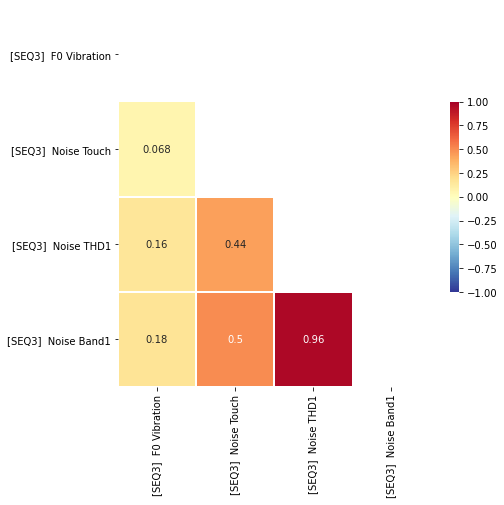

In [41]:
data3 = SEQ3_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data3, 
            cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### sweep 주파수 Vibration과 Noise의 선형관계

##### [SEQ3]  F0 Vibration과 Noise Touch의 상관계수 : 0.068
##### [SEQ3]  F0 Vibration과 Noise THD1의 상관계수 : 0.16
##### [SEQ3]  F0 Vibration과 Noise Band1의 상관계수 : 0.18

In [42]:
import scipy.stats as stats
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise Touch'])

(0.06795026449785586, 3.615489228387462e-17)

In [43]:
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise THD1'])

(0.16124239813449584, 7.377852257542049e-90)

In [44]:
stats.pearsonr(x = SEQ3_df['[SEQ3]  F0 Vibration'], y = SEQ3_df['[SEQ3]  Noise Band1'])

(0.17864620573752638, 3.432845574588997e-110)

#### p값이 모두 0.05 혹은 0.01보다 크기 때문에 상관계수를 정의할 수 없다.

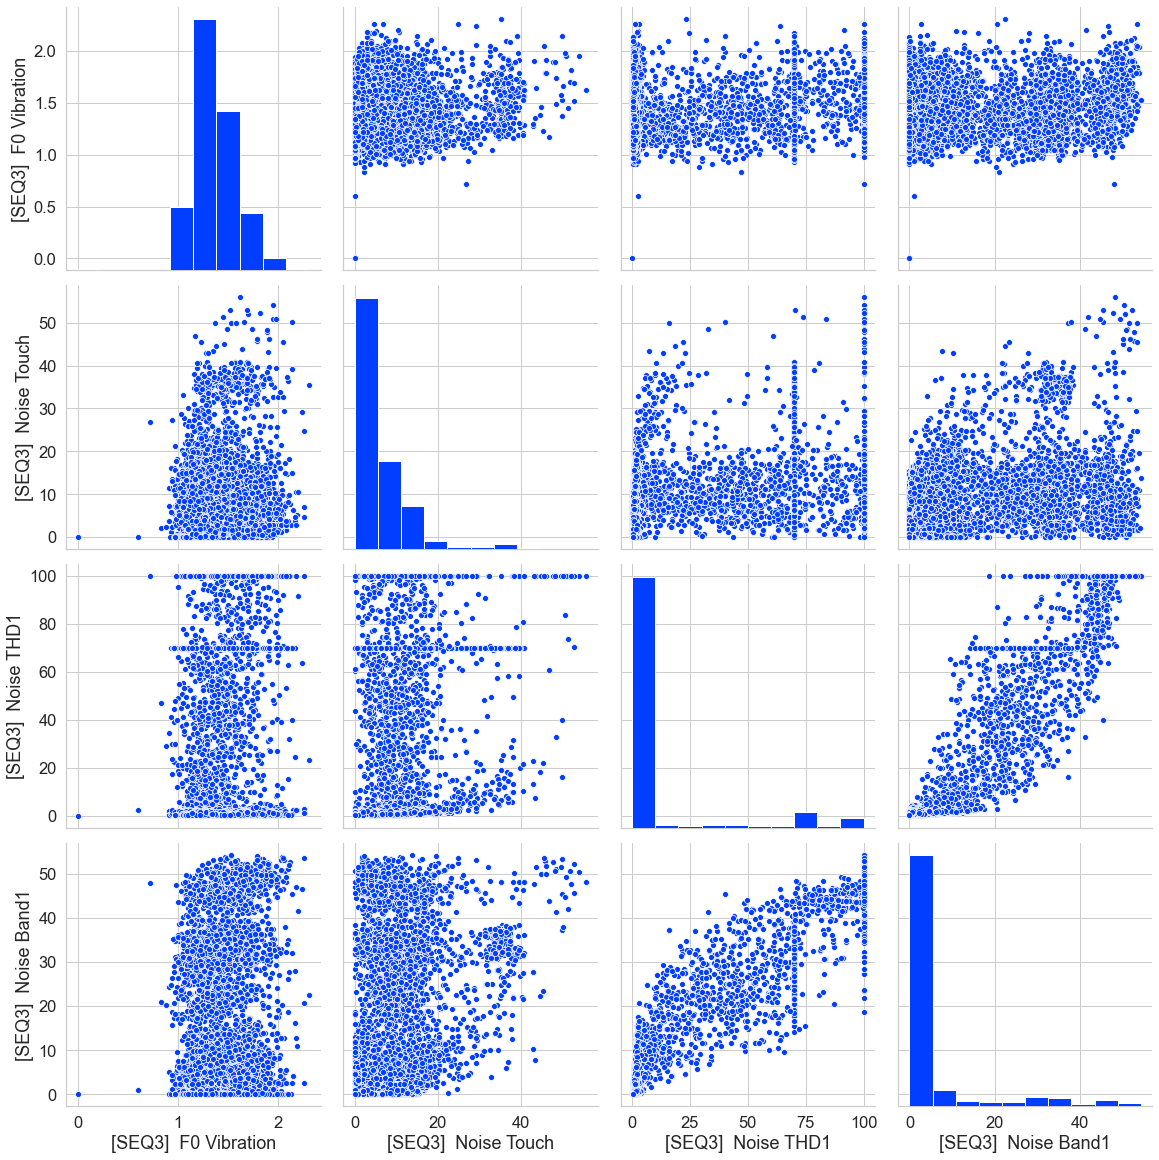

In [265]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ3_df, height=4)